=== SALES BY CATEGORY (Sorted Ascending) ===
Soghaat: 52.9 jt
Kids & Baby: 70.2 jt
Superstore: 96.5 jt
Others: 149.3 jt
Health & Sports: 149.7 jt
Beauty & Grooming: 169.9 jt


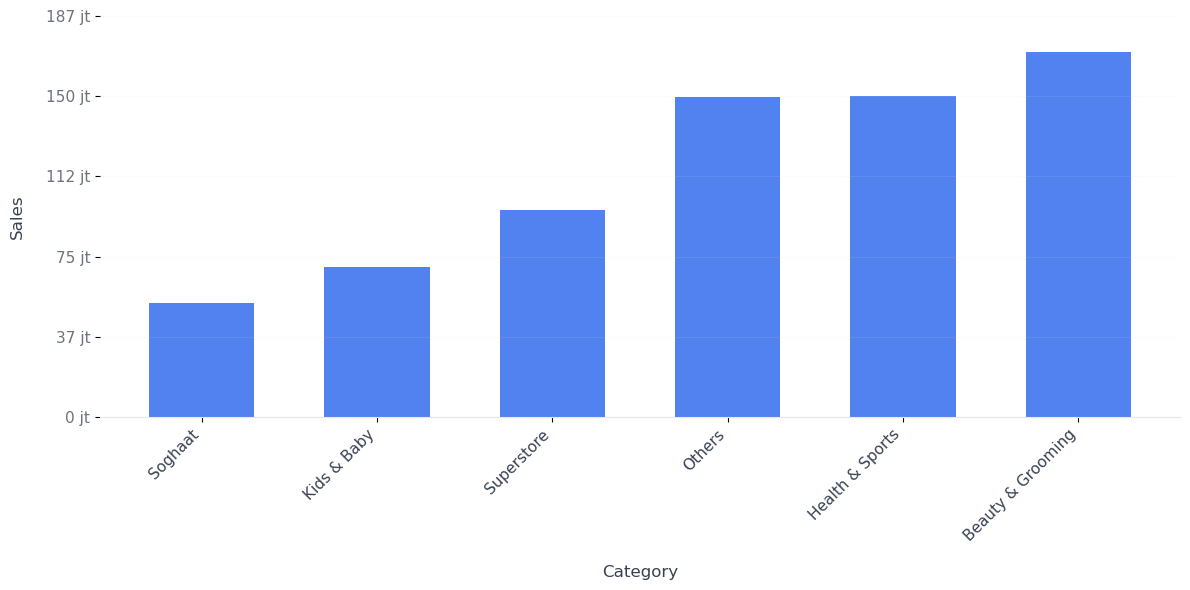

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Copy of finalProj_df - df.csv')
df['order_date'] = pd.to_datetime(df['order_date'])

expected_categories = ['Beauty & Grooming', 'Health & Sports', 'Superstore', 
                      'Kids & Baby', 'Soghaat', 'Others']

category_sales = df.groupby('category')['after_discount'].sum()

sales_data = {}
for category in expected_categories:
    if category in category_sales.index:
        sales_data[category] = category_sales[category]
    else:
        similar_cats = [cat for cat in category_sales.index if category.lower() in cat.lower()]
        sales_data[category] = category_sales[similar_cats[0]] if similar_cats else 0

category_names = list(sales_data.keys())
sales_values = list(sales_data.values())

sorted_data = sorted(zip(category_names, sales_values), key=lambda x: x[1])
category_names_sorted = [item[0] for item in sorted_data]
sales_values_sorted = [item[1] for item in sorted_data]

scaled_sales = [val / 1000000 for val in sales_values_sorted]

print("=== SALES BY CATEGORY (Sorted Ascending) ===")
for category, sales in zip(category_names_sorted, scaled_sales):
    print(f"{category}: {sales:.1f} jt")

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(category_names_sorted, scaled_sales, color='#2563EB', alpha=0.8, width=0.6)

for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_color('#E5E7EB')

max_sales = max(scaled_sales)
yticks = np.linspace(0, max_sales * 1.1, 6)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{y:.0f} jt' for y in yticks], fontsize=11, color='#6B7280')

plt.xticks(rotation=45, ha='right', fontsize=11, color='#374151')

ax.set_ylabel('Sales', fontsize=12, color='#374151', labelpad=15)
 
ax.set_xlabel('Category', fontsize=12, color='#374151', labelpad=15)

ax.grid(axis='y', alpha=0.1, color='#E5E7EB', linestyle='-')

plt.tight_layout()
plt.savefig('sales_by_category.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()